In [1]:
#import libraries
import os
import random as rd
import tensorflow as tf
import matplotlib.pyplot as plt
#import pyBigWig as pbg
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd



2023-03-06 10:37:17.750904: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-06 10:37:17.819068: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-06 10:37:18.132386: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/dell3/anaconda3/envs/workenv/lib/
2023-03-06 10:37:18.132432: W tensorflow/compiler/xla/str

In [4]:
#cor_losses
import keras.backend as K

def mae_cor(y_true, y_pred):
    """Compute loss with Mean absolute error and correlation.
        :Example:
        >>> model.compile(optimizer = 'adam', losses = mae_cor)
        >>> load_model('file', custom_objects = {'mae_cor : mae_cor})
    """
    X = y_true - K.mean(y_true)
    Y = y_pred - K.mean(y_pred)

    sigma_XY = K.sum(X*Y)
    sigma_X = K.sqrt(K.sum(X*X))
    sigma_Y = K.sqrt(K.sum(Y*Y))

    cor = sigma_XY/(sigma_X*sigma_Y + K.epsilon())
    mae = K.mean(K.abs(y_true - y_pred))

    return (1 - cor) + mae

def mse_cor(y_true, y_pred):
    """Compute loss with Mean squared error and correlation.
    """
    X = y_true - K.mean(y_true)
    Y = y_pred - K.mean(y_pred)

    sigma_XY = K.sum(X*Y)
    sigma_X = K.sqrt(K.sum(X*X))
    sigma_Y = K.sqrt(K.sum(Y*Y))

    cor = sigma_XY/(sigma_X*sigma_Y + K.epsilon())
    mse = K.sqrt(K.mean(K.abs(y_true - y_pred)**2))

    cor_mse=(1 - cor) + mse
    #print(tf.math.is_nan(cor_mse))
    if tf.math.is_nan(cor_mse):
        print(X,Y)
        print('oui')
    #print(type(tf.math.is_nan(cor_mse)))

    return cor_mse

In [201]:
a=tf.constant([])
b=tf.constant([])
mse_cor(a,b)


tf.Tensor([], shape=(0,), dtype=float32) tf.Tensor([], shape=(0,), dtype=float32)
oui


<tf.Tensor: shape=(), dtype=float32, numpy=nan>

In [3]:
#get all chr and their respective lenghts
X_2L=np.load('/home/florian/projet/r6.16/seq.npz')['2L']
X_2R=np.load('/home/florian/projet/r6.16/seq.npz')['2R']
X_3L=np.load('/home/florian/projet/r6.16/seq.npz')['3L']
X_3R=np.load('/home/florian/projet/r6.16/seq.npz')['3R']
X_4=np.load('/home/florian/projet/r6.16/seq.npz')['4']
X_X=np.load('/home/florian/projet/r6.16/seq.npz')['X']
X_Y=np.load('/home/florian/projet/r6.16/seq.npz')['Y']

In [3]:
#single bigwig to numpy
os.chdir('/home/florian/projet/scATACseq')
fichiers=['/home/florian/projet/scATACseq/Astrocyte_like.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/Cortexglia.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/Ensheathingglia.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/Perineurialglia.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/Subperineurialglia.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/T1.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/T2.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/T2a.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/T3.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/T4.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/T5.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/KC_AB.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/KC_ABp.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/KC_G.dedup.no_blacklist.RPGCnormalized.bw']
valeurs =[]
chr=["2L","2R","3R","3L","4","X","Y"]
for file in fichiers:
    #print("processing file", file)
    bw=pbg.open(file)
    array = np.array(())
    for j in chr:
        array=np.append(array,bw.values(j,0,-1,numpy=True))
    if len(valeurs) == 0:
        valeurs = array
    else:
        valeurs += array
os.chdir('/home/florian/projet')
np.savez_compressed('scATACseq14',valeurs=valeurs)

In [ ]:
#bigwig to numpy v3
os.chdir('/home/florian/projet/scATACseq')
fichiers=['/home/florian/projet/scATACseq/Astrocyte_like.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/Cortexglia.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/Ensheathingglia.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/Perineurialglia.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/Subperineurialglia.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/T1.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/T2.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/T2a.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/T3.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/T4.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/T5.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/KC_AB.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/KC_ABp.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/KC_G.dedup.no_blacklist.RPGCnormalized.bw']
valeurs =[]
Dic={}
chr=["2L","2R","3L","3R","4","X","Y"]
lens=[len(X_2L),len(X_2R),len(X_3L),len(X_3R),len(X_4),len(X_X),len(X_Y)]
for i in range(len(chr)):
    Dic[chr[i]]=np.zeros((1,lens[i]))
for file in fichiers:
    #print("processing file", file)
    bw=pbg.open(file)
    array = np.array(())
    for j in chr:
        Dic[j]=Dic[j]+bw.values(j,0,-1,numpy=True)

os.chdir('/home/florian/projet')
np.savez_compressed('scATACseq_14chr',**Dic)

In [4]:
#create scATAC values for each chr
Y_2L=np.load('/home/florian/projet/scATACseq_14chr.npz')['2L'][0]
Y_2L[Y_2L >= 100] = 100
Y_2L=Y_2L/100

Y_2R=np.load('/home/florian/projet/scATACseq_14chr.npz')['2R'][0]
Y_2R[Y_2R >= 100] = 100
Y_2R=Y_2R/100

Y_3L=np.load('/home/florian/projet/scATACseq_14chr.npz')['3L'][0]
Y_3L[Y_3L >= 100] = 100
Y_3L=Y_3L/100

Y_3R=np.load('/home/florian/projet/scATACseq_14chr.npz')['3R'][0]
Y_3R[Y_3R >= 100] = 100
Y_3R=Y_3R/100

Y_4=np.load('/home/florian/projet/scATACseq_14chr.npz')['4'][0]
Y_4[Y_4 >= 100] = 100
Y_4=Y_4/100

Y_X=np.load('/home/florian/projet/scATACseq_14chr.npz')['X'][0]
Y_X[Y_X >= 100] = 100
Y_X=Y_X/100

Y_Y=np.load('/home/florian/projet/scATACseq_14chr.npz')['Y'][0]
Y_Y[Y_Y >= 100] = 100
Y_Y=Y_Y/100

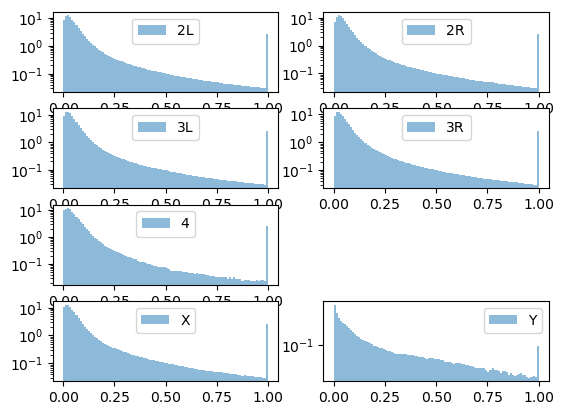

In [25]:
plt.subplot(4,2,1)
plt.yscale("log")
plt.hist(Y_2L,bins=100,alpha=0.5,label="2L",density=True)
plt.legend()
plt.subplot(4,2,2)
plt.yscale("log")
plt.hist(Y_2R,bins=100,alpha=0.5,label="2R",density=True)
plt.legend()
plt.subplot(4,2,3)
plt.yscale("log")
plt.hist(Y_3L,bins=100,alpha=0.5,label="3L",density=True)
plt.legend()
plt.subplot(4,2,4)
plt.yscale("log")
plt.hist(Y_3R,bins=100,alpha=0.5,label="3R",density=True)
plt.legend()
plt.subplot(4,2,5)
plt.yscale("log")
plt.hist(Y_4,bins=100,alpha=0.5,label="4",density=True)
plt.legend()
plt.yscale("log")
plt.subplot(4,2,7)
plt.hist(Y_X,bins=100,alpha=0.5,label="X",density=True)
plt.legend()
plt.yscale("log")
plt.subplot(4,2,8)
plt.hist(Y_Y,bins=100,alpha=0.5,label="Y",density=True)
plt.legend()
plt.yscale("log")
plt.legend()

In [34]:
#create binned scATAC values for each chr
Y_2L_bins=[]
for i in Y_2L[::10]:
    Y_2L_bins+=[i]*10
while len(Y_2L_bins)>len(X_2L):
    Y_2L_bins.pop()
Y_2L_bins=np.array(Y_2L_bins)

Y_2R_bins=[]
for i in Y_2R[::10]:
    Y_2R_bins+=[i]*10
while len(Y_2R_bins)>len(X_2R):
    Y_2R_bins.pop()
Y_2R_bins=np.array(Y_2R_bins)

Y_3L_bins=[]
for i in Y_3L[::10]:
    Y_3L_bins+=[i]*10
while len(Y_3L_bins)>len(X_3L):
    Y_3L_bins.pop()
Y_3L_bins=np.array(Y_3L_bins)

Y_3R_bins=[]
for i in Y_3R[::10]:
    Y_3R_bins+=[i]*10
while len(Y_3R_bins)>len(X_3R):
    Y_3R_bins.pop()
Y_3R_bins=np.array(Y_3R_bins)

Y_4_bins=[]
for i in Y_4[::10]:
    Y_4_bins+=[i]*10
while len(Y_4_bins)>len(X_4):
    Y_4_bins.pop()
Y_4_bins=np.array(Y_4_bins)

Y_X_bins=[]
for i in Y_X[::10]:
    Y_X_bins+=[i]*10
while len(Y_X_bins)>len(X_X):
    Y_X_bins.pop()
Y_X_bins=np.array(Y_X_bins)

Y_Y_bins=[]
for i in Y_Y[::10]:
    Y_Y_bins+=[i]*10
while len(Y_Y_bins)>len(X_Y):
    Y_Y_bins.pop()
Y_Y_bins=np.array(Y_Y_bins)


(100000.0, 200000.0)

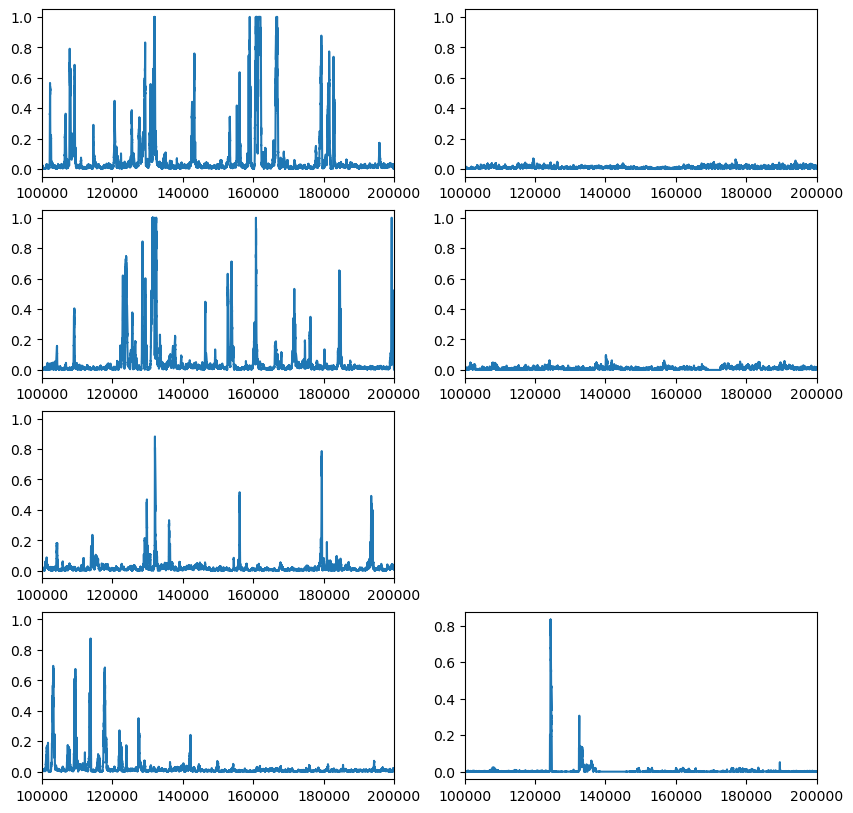

In [35]:
w_start, w_stop = 100_000, 200_000

plt.figure(figsize=(10,10))

plt.subplot(4,2,1)
plt.plot(Y_2L)
plt.xlim(w_start,w_stop)

plt.subplot(4,2,2)
plt.plot(Y_2R)
plt.xlim(w_start,w_stop)

plt.subplot(4,2,3)
plt.plot(Y_3L)
plt.xlim(w_start,w_stop)

plt.subplot(4,2,4)
plt.plot(Y_3R)
plt.xlim(w_start,w_stop)

plt.subplot(4,2,5)
plt.plot(Y_4)
plt.xlim(w_start,w_stop)

plt.subplot(4,2,7)
plt.plot(Y_X)
plt.xlim(w_start,w_stop)

plt.subplot(4,2,8)
plt.plot(Y_Y)
plt.xlim(w_start,w_stop)


In [17]:
#generator weighted homebrew (new weights each batch) binned
class MyHbWeightedSequence(tf.keras.utils.Sequence):

    def __init__(self, x_set, y_set, batch_size, max_data=2**20, WINDOW=2001):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size
        self.WINDOW = WINDOW
        n_data = min(len(self.x)-self.WINDOW+1, max_data)
        self.indices = np.arange(self.WINDOW//2, n_data+self.WINDOW//2)#[::10]
        np.random.shuffle(self.indices)

    def __len__(self):
        return int(np.ceil(len(self.indices) / self.batch_size))

    def __getitem__(self, idx):
        batch_indices = self.indices[idx*self.batch_size:(idx+1)*self.batch_size]
        window_indices = batch_indices.reshape(-1, 1) + np.arange(-(self.WINDOW//2), self.WINDOW//2 + 1).reshape(1, -1)
        batch_x = self.x[window_indices]
        batch_y = self.y[batch_indices]
        bin_values, bin_edges = np.histogram(batch_y, bins=500)
        bin_indices = np.digitize(batch_y, bin_edges)
        bin_indices[bin_indices == 501] = 500
        bin_indices -= 1
        batch_weights = 1 / bin_values[bin_indices]
        return batch_x, batch_y, batch_weights
        
    def on_epoch_end(self):
        np.random.shuffle(self.indices)


In [5]:
#generator weighted homebrew (new weights each batch) without Ns
class MyHbWeightedSequence(tf.keras.utils.Sequence):

    def __init__(self, x_set, y_set, batch_size, max_data=2**20, WINDOW=2001):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size
        self.WINDOW = WINDOW
        n_data = min(len(self.x)-self.WINDOW+1, max_data)
        N_loc=np.sum(self.x, axis=1) == 0
        Bases_loc=np.convolve(N_loc, np.ones(self.WINDOW), "same")
        Bases_loc=np.asarray(Bases_loc,dtype="int")
        self.indices = np.arange(len(Bases_loc))
        self.indices = self.indices[Bases_loc==0]
        self.indices=np.unique(self.indices)
        self.indices=np.clip(self.indices,self.WINDOW//2,len(self.x)-self.WINDOW//2 -1)
        # self.indices = np.arange(self.WINDOW//2, n_data+self.WINDOW//2)[Bases_loc==0]
        np.random.shuffle(self.indices)

    def __len__(self):
        return int(np.ceil(len(self.indices) / self.batch_size))

    def __getitem__(self, idx):
        batch_indices = self.indices[idx*self.batch_size:(idx+1)*self.batch_size]
        window_indices = batch_indices.reshape(-1, 1) + np.arange(-(self.WINDOW//2), self.WINDOW//2 + 1).reshape(1, -1)
        batch_x = self.x[window_indices]
        batch_y = self.y[batch_indices]
        bin_values, bin_edges = np.histogram(batch_y, bins=500)
        bin_indices = np.digitize(batch_y, bin_edges)
        bin_indices[bin_indices == 501] = 500
        bin_indices -= 1
        batch_weights = 1 / bin_values[bin_indices]

        return batch_x, batch_y, batch_weights
        
    def on_epoch_end(self):
        np.random.shuffle(self.indices)

In [6]:
#generates homebrew weighted values
x=X_2L
y=Y_2L
x_valid=X_2R
y_valid=Y_2R
gen = MyHbWeightedSequence(x, y, 1024, max_data=2**18)
gen_valid = MyHbWeightedSequence(x_valid, y_valid, 1024, max_data=2**14)

In [ ]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(128, kernel_size=(6), activation='relu', input_shape=(2001,4)),
    tf.keras.layers.MaxPooling1D(pool_size=(2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, kernel_size=(12), activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=(2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(32, kernel_size=(12), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation="sigmoid")
    ])

model2.compile(loss=mse_cor,
    optimizer='adam',
    metrics=['mae'],
    run_eagerly=True)

In [ ]:
#training with checkpoint saving
print(tf.config.list_physical_devices())
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath='/home/florian/projet/models/binned_training_reversed/cp.cpkt',
                                                 save_weights_only=True,
                                                 verbose=1)
early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='loss',patience=3,restore_best_weights=True)
model2.fit(gen,validation_data=gen_valid,epochs=10,verbose=1, callbacks=[cp_callback,early_stop_callback])

In [87]:
#create data set for prediction
start, stop = 450_000, 550_000

X_chr2L=[]
for i in range(start,stop):
    X_chr2L.append(X_2L[i-1000:i+1001])
X_chr2L = np.array(X_chr2L)

X_chr2R=[]
for i in range(start,stop):
    X_chr2R.append(X_2R[i-1000:i+1001])
X_chr2R = np.array(X_chr2R)

X_chr3L=[]
for i in range(start,stop):
    X_chr3L.append(X_3L[i-1000:i+1001])
X_chr3L = np.array(X_chr3L)

X_chr3R=[]
for i in range(start,stop):
    X_chr3R.append(X_3R[i-1000:i+1001])
X_chr3R = np.array(X_chr3R)

X_chr4=[]
for i in range(start,stop):
    X_chr4.append(X_4[i-1000:i+1001])
X_chr4 = np.array(X_chr4)

X_chrX=[]
for i in range(start,stop):
    X_chrX.append(X_X[i-1000:i+1001])
X_chrX = np.array(X_chrX)

X_chrY=[]
for i in range(start,stop):
    X_chrY.append(X_Y[i-1000:i+1001])
X_chrY = np.array(X_chrY)

In [88]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(128, kernel_size=(6), activation='relu', input_shape=(2001,4)),
    tf.keras.layers.MaxPooling1D(pool_size=(2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, kernel_size=(12), activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=(2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(32, kernel_size=(12), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation="sigmoid")
    ])
model2.load_weights('/home/florian/projet/models/2L_3R/cp.cpkt')
pred2L=model2.predict(X_chr2L,batch_size=1024)

98/98 [==============================] - 39s 392ms/step


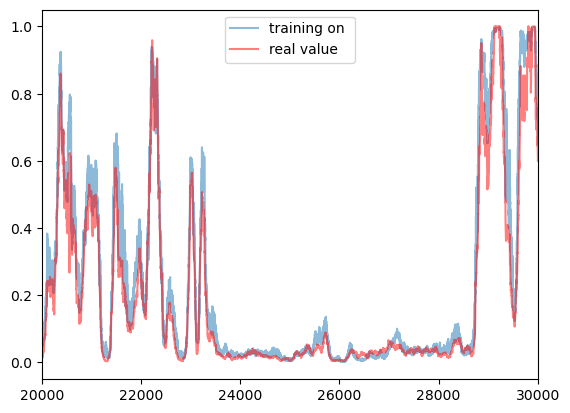

In [15]:
plt.plot(pred2L,alpha=0.5,label="training on ")
plt.plot(Y_2L[start:stop],alpha=0.5,label="real value",color="red")
plt.xlim((20_000, 30_000))
plt.legend()

In [12]:
print("correlation 2L", str(np.corrcoef(Y_2L[start:stop],pred2L.ravel())[0][1]))
print("correlation 2R", str(np.corrcoef(Y_2R[start:stop],pred2R.ravel())[0][1]))
print("correlation 3L", str(np.corrcoef(Y_3L[start:stop],pred3L.ravel())[0][1]))
print("correlation 3R", str(np.corrcoef(Y_3R[start:stop],pred3R.ravel())[0][1]))
print("correlation 4", str(np.corrcoef(Y_4[start:stop],pred4.ravel())[0][1]))
print("correlation X", str(np.corrcoef(Y_X[start:stop],predX.ravel())[0][1]))
print("correlation Y", str(np.corrcoef(Y_Y[start:stop],predY.ravel())[0][1]))

correlation 2L 0.9875528557579419


In [40]:
df = pd.read_csv ('/home/florian/projet/models/test/history.csv')
print(df)

    Unnamed: 0      loss       mae  val_loss   val_mae
0            0  0.094788  0.111290  0.089134  0.114730
1            1  0.084486  0.107863  0.089530  0.114725
2            2  0.081246  0.107871  0.088275  0.114654
3            3  0.078878  0.107871  0.087205  0.114697
4            4  0.076532  0.107878  0.089340  0.114719
5            5  0.073762  0.107884  0.088306  0.114705
6            6  0.072738  0.107882  0.089919  0.114729
7            7  0.070937  0.107884  0.089687  0.114721
8            8  0.069183  0.107883  0.091663  0.114722
9            9  0.068003  0.107883  0.091534  0.114698
10          10  0.066721  0.107884  0.091057  0.114720
11          11  0.065004  0.107885  0.091334  0.114721
12          12  0.064010  0.107883  0.092852  0.114729
13          13  0.063686  0.107884  0.093462  0.114727
14          14  0.062315  0.107885  0.092656  0.114729
15          15  0.061608  0.107885  0.094702  0.114730
16          16  0.060699  0.107885  0.092390  0.114719
17        

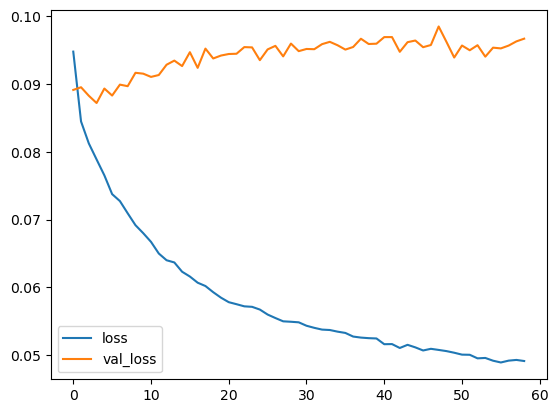

In [41]:
plt.plot(df['loss'],label='loss')
plt.plot(df['val_loss'],label="val_loss")
plt.legend()

In [54]:
pred2L=np.load('/home/florian/projet/models/preds_for_epochs.npz')['pred2L']
pred2R=np.load('/home/florian/projet/models/preds_for_epochs.npz')['pred2R']
pred3L=np.load('/home/florian/projet/models/preds_for_epochs.npz')['pred3L']
pred3R=np.load('/home/florian/projet/models/preds_for_epochs.npz')['pred3R']
pred4=np.load('/home/florian/projet/models/preds_for_epochs.npz')['pred4']
predX=np.load('/home/florian/projet/models/preds_for_epochs.npz')['predX']
predY=np.load('/home/florian/projet/models/preds_for_epochs.npz')['predY']

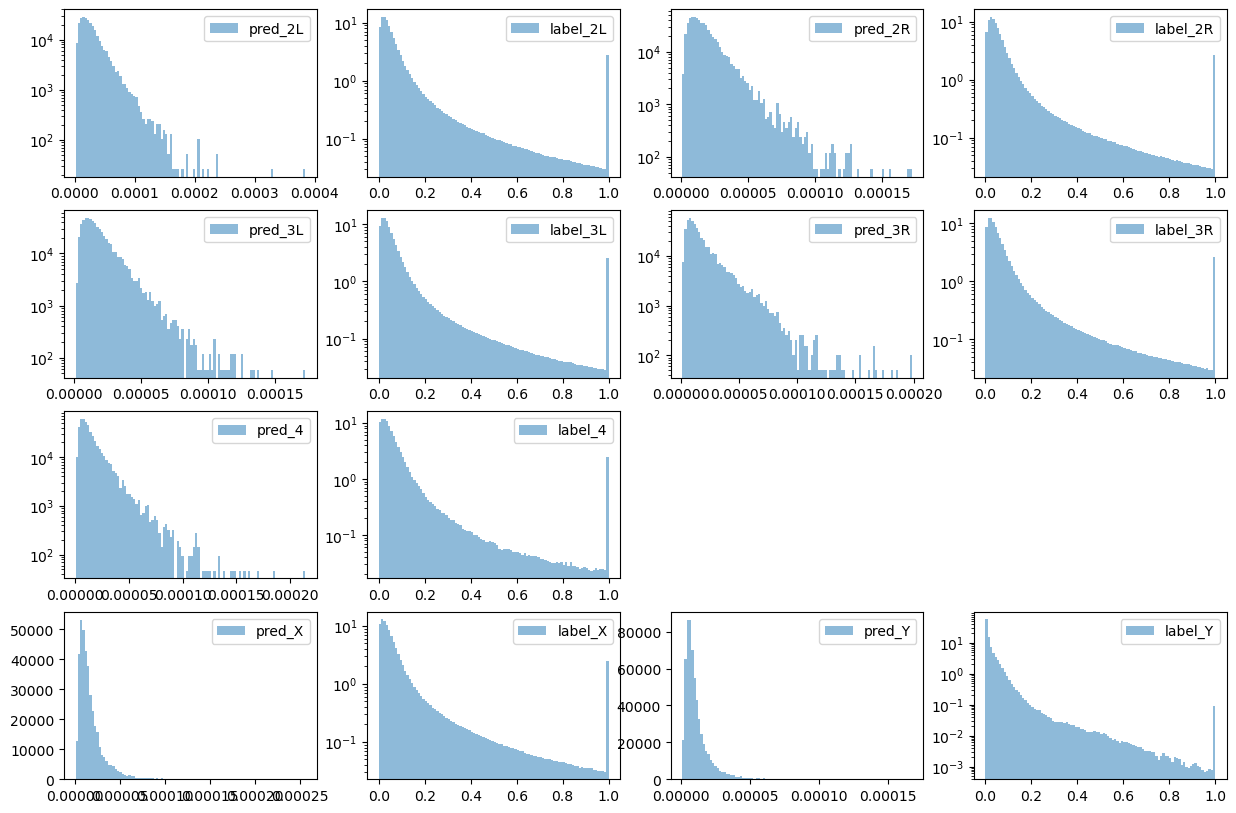

In [50]:
plt.figure(figsize=(15,10))
plt.subplot(4,4,1)
plt.yscale("log")
plt.hist(pred2L,bins=100,alpha=0.5,label="pred_2L",density=True)
plt.legend()
plt.subplot(4,4,2)
plt.yscale("log")
plt.hist(Y_2L,bins=100,alpha=0.5,label="label_2L",density=True)
plt.legend()

plt.subplot(4,4,3)
plt.yscale("log")
plt.hist(pred2R,bins=100,alpha=0.5,label="pred_2R",density=True)
plt.legend()
plt.subplot(4,4,4)
plt.yscale("log")
plt.hist(Y_2R,bins=100,alpha=0.5,label="label_2R",density=True)
plt.legend()

plt.subplot(4,4,5)
plt.yscale("log")
plt.hist(pred3L,bins=100,alpha=0.5,label="pred_3L",density=True)
plt.legend()
plt.subplot(4,4,6)
plt.yscale("log")
plt.hist(Y_3L,bins=100,alpha=0.5,label="label_3L",density=True)
plt.legend()

plt.subplot(4,4,7)
plt.yscale("log")
plt.hist(pred3R,bins=100,alpha=0.5,label="pred_3R",density=True)
plt.legend()
plt.subplot(4,4,8)
plt.yscale("log")
plt.hist(Y_3R,bins=100,alpha=0.5,label="label_3R",density=True)
plt.legend()

plt.subplot(4,4,9)
plt.yscale("log")
plt.hist(pred4,bins=100,alpha=0.5,label="pred_4",density=True)
plt.legend()
plt.subplot(4,4,10)
plt.yscale("log")
plt.hist(Y_4,bins=100,alpha=0.5,label="label_4",density=True)
plt.legend()

plt.yscale("log")
plt.subplot(4,4,13)
plt.hist(predX,bins=100,alpha=0.5,label="pred_X",density=True)
plt.legend()
plt.subplot(4,4,14)
plt.yscale("log")
plt.hist(Y_X,bins=100,alpha=0.5,label="label_X",density=True)
plt.legend()

plt.yscale("log")
plt.subplot(4,4,15)
plt.hist(predY,bins=100,alpha=0.5,label="pred_Y",density=True)
plt.legend()
plt.subplot(4,4,16)
plt.yscale("log")
plt.hist(Y_Y,bins=100,alpha=0.5,label="label_Y",density=True)
plt.legend()

correlation 2L 0.12409282233179209
correlation 2R 0.03584503610763155
correlation 3L 0.3035304848671352
correlation 3R 0.29315513314972746
correlation 4 0.09314086165853475
correlation X 0.22458447358910927
correlation Y 0.20784821154251676

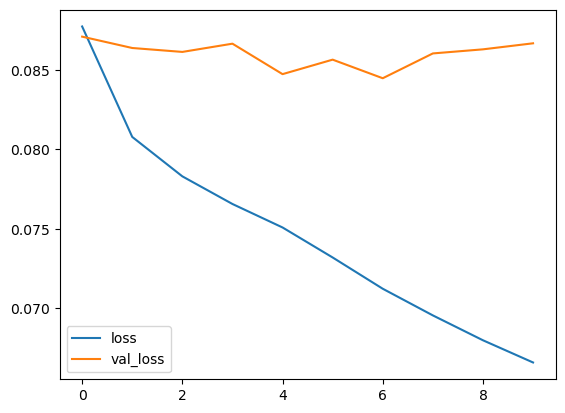

In [56]:
df = pd.read_csv ('/home/florian/projet/models/test_2/history.csv')
plt.plot(df['loss'],label='loss')
plt.plot(df['val_loss'],label="val_loss")
plt.legend()

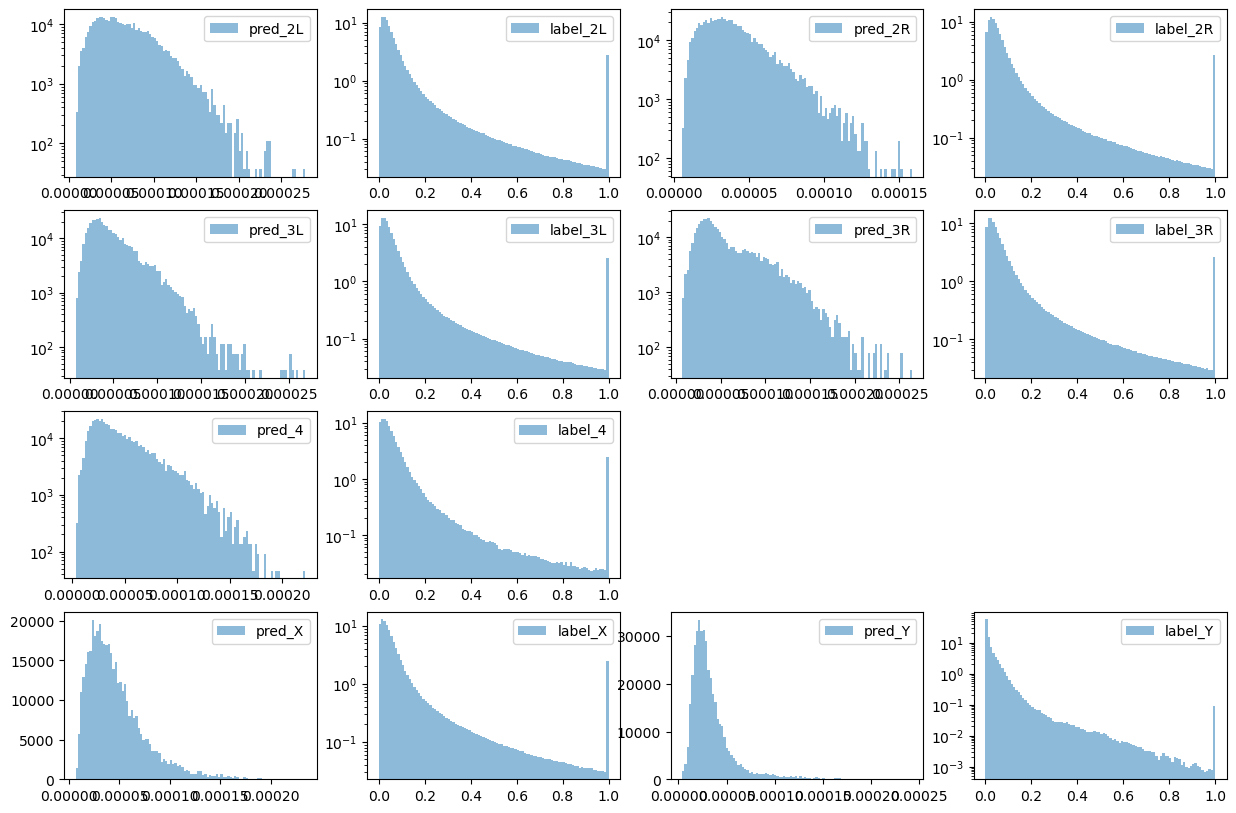

In [55]:
plt.figure(figsize=(15,10))
plt.subplot(4,4,1)
plt.yscale("log")
plt.hist(pred2L,bins=100,alpha=0.5,label="pred_2L",density=True)
plt.legend()
plt.subplot(4,4,2)
plt.yscale("log")
plt.hist(Y_2L,bins=100,alpha=0.5,label="label_2L",density=True)
plt.legend()

plt.subplot(4,4,3)
plt.yscale("log")
plt.hist(pred2R,bins=100,alpha=0.5,label="pred_2R",density=True)
plt.legend()
plt.subplot(4,4,4)
plt.yscale("log")
plt.hist(Y_2R,bins=100,alpha=0.5,label="label_2R",density=True)
plt.legend()

plt.subplot(4,4,5)
plt.yscale("log")
plt.hist(pred3L,bins=100,alpha=0.5,label="pred_3L",density=True)
plt.legend()
plt.subplot(4,4,6)
plt.yscale("log")
plt.hist(Y_3L,bins=100,alpha=0.5,label="label_3L",density=True)
plt.legend()

plt.subplot(4,4,7)
plt.yscale("log")
plt.hist(pred3R,bins=100,alpha=0.5,label="pred_3R",density=True)
plt.legend()
plt.subplot(4,4,8)
plt.yscale("log")
plt.hist(Y_3R,bins=100,alpha=0.5,label="label_3R",density=True)
plt.legend()

plt.subplot(4,4,9)
plt.yscale("log")
plt.hist(pred4,bins=100,alpha=0.5,label="pred_4",density=True)
plt.legend()
plt.subplot(4,4,10)
plt.yscale("log")
plt.hist(Y_4,bins=100,alpha=0.5,label="label_4",density=True)
plt.legend()

plt.yscale("log")
plt.subplot(4,4,13)
plt.hist(predX,bins=100,alpha=0.5,label="pred_X",density=True)
plt.legend()
plt.subplot(4,4,14)
plt.yscale("log")
plt.hist(Y_X,bins=100,alpha=0.5,label="label_X",density=True)
plt.legend()

plt.yscale("log")
plt.subplot(4,4,15)
plt.hist(predY,bins=100,alpha=0.5,label="pred_Y",density=True)
plt.legend()
plt.subplot(4,4,16)
plt.yscale("log")
plt.hist(Y_Y,bins=100,alpha=0.5,label="label_Y",density=True)
plt.legend()

correlation 2L 0.27087600266554973
correlation 2R 0.0659835519223066
correlation 3L 0.3652363396158054
correlation 3R 0.2828152602226793
correlation 4 0.21835697014497912
correlation X 0.3300837847611316
correlation Y 0.2925394316469329

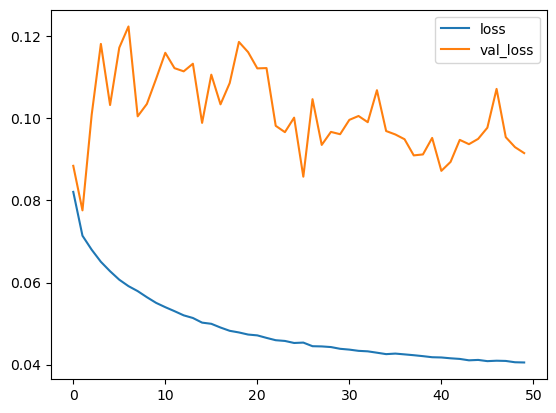

In [13]:
df = pd.read_csv ('/home/florian/projet/models/test_2/history.csv')
plt.plot(df['loss'],label='loss')
plt.plot(df['val_loss'],label="val_loss")
plt.legend()

In [14]:
pred2L=np.load('/home/florian/projet/models/preds_for_epochs.npz')['pred2L']
pred2R=np.load('/home/florian/projet/models/preds_for_epochs.npz')['pred2R']
pred3L=np.load('/home/florian/projet/models/preds_for_epochs.npz')['pred3L']
pred3R=np.load('/home/florian/projet/models/preds_for_epochs.npz')['pred3R']
pred4=np.load('/home/florian/projet/models/preds_for_epochs.npz')['pred4']
predX=np.load('/home/florian/projet/models/preds_for_epochs.npz')['predX']
predY=np.load('/home/florian/projet/models/preds_for_epochs.npz')['predY']

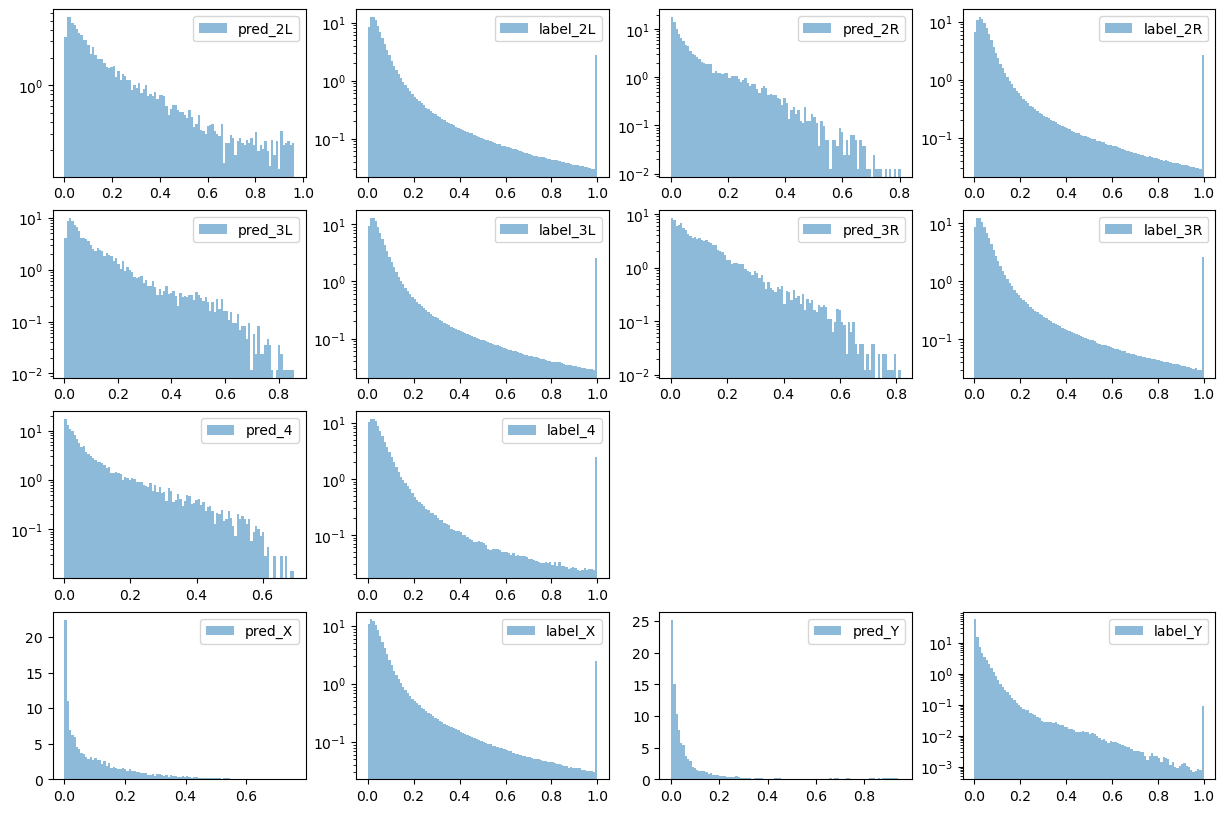

: 

In [15]:
plt.figure(figsize=(15,10))
plt.subplot(4,4,1)
plt.yscale("log")
plt.hist(pred2L,bins=100,alpha=0.5,label="pred_2L",density=True)
plt.legend()
plt.subplot(4,4,2)
plt.yscale("log")
plt.hist(Y_2L,bins=100,alpha=0.5,label="label_2L",density=True)
plt.legend()

plt.subplot(4,4,3)
plt.yscale("log")
plt.hist(pred2R,bins=100,alpha=0.5,label="pred_2R",density=True)
plt.legend()
plt.subplot(4,4,4)
plt.yscale("log")
plt.hist(Y_2R,bins=100,alpha=0.5,label="label_2R",density=True)
plt.legend()

plt.subplot(4,4,5)
plt.yscale("log")
plt.hist(pred3L,bins=100,alpha=0.5,label="pred_3L",density=True)
plt.legend()
plt.subplot(4,4,6)
plt.yscale("log")
plt.hist(Y_3L,bins=100,alpha=0.5,label="label_3L",density=True)
plt.legend()

plt.subplot(4,4,7)
plt.yscale("log")
plt.hist(pred3R,bins=100,alpha=0.5,label="pred_3R",density=True)
plt.legend()
plt.subplot(4,4,8)
plt.yscale("log")
plt.hist(Y_3R,bins=100,alpha=0.5,label="label_3R",density=True)
plt.legend()

plt.subplot(4,4,9)
plt.yscale("log")
plt.hist(pred4,bins=100,alpha=0.5,label="pred_4",density=True)
plt.legend()
plt.subplot(4,4,10)
plt.yscale("log")
plt.hist(Y_4,bins=100,alpha=0.5,label="label_4",density=True)
plt.legend()

plt.yscale("log")
plt.subplot(4,4,13)
plt.hist(predX,bins=100,alpha=0.5,label="pred_X",density=True)
plt.legend()
plt.subplot(4,4,14)
plt.yscale("log")
plt.hist(Y_X,bins=100,alpha=0.5,label="label_X",density=True)
plt.legend()

plt.yscale("log")
plt.subplot(4,4,15)
plt.hist(predY,bins=100,alpha=0.5,label="pred_Y",density=True)
plt.legend()
plt.subplot(4,4,16)
plt.yscale("log")
plt.hist(Y_Y,bins=100,alpha=0.5,label="label_Y",density=True)
plt.legend()

correlation 2L 0.21210051853516626
correlation 2R 0.055063176679212046
correlation 3L 0.1755457609301076
correlation 3R 0.2848241228314632
correlation 4 0.13073155197414213
correlation X 0.07985715642058207
correlation Y 0.1615989234374876

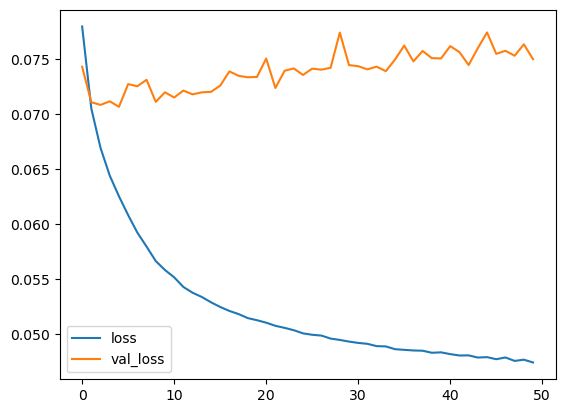

In [174]:
df = pd.read_csv ('/home/florian/projet/models/test_3/history.csv')
plt.plot(df['loss'],label='loss')
plt.plot(df['val_loss'],label="val_loss")
plt.legend()

In [85]:
pred2L=np.load('/home/florian/projet/models/preds_test_3.npz')['pred2L']
pred2R=np.load('/home/florian/projet/models/preds_test_3.npz')['pred2R']
pred3L=np.load('/home/florian/projet/models/preds_test_3.npz')['pred3L']
pred3R=np.load('/home/florian/projet/models/preds_test_3.npz')['pred3R']
pred4=np.load('/home/florian/projet/models/preds_test_3.npz')['pred4']
predX=np.load('/home/florian/projet/models/preds_test_3.npz')['predX']
predY=np.load('/home/florian/projet/models/preds_test_3.npz')['predY']

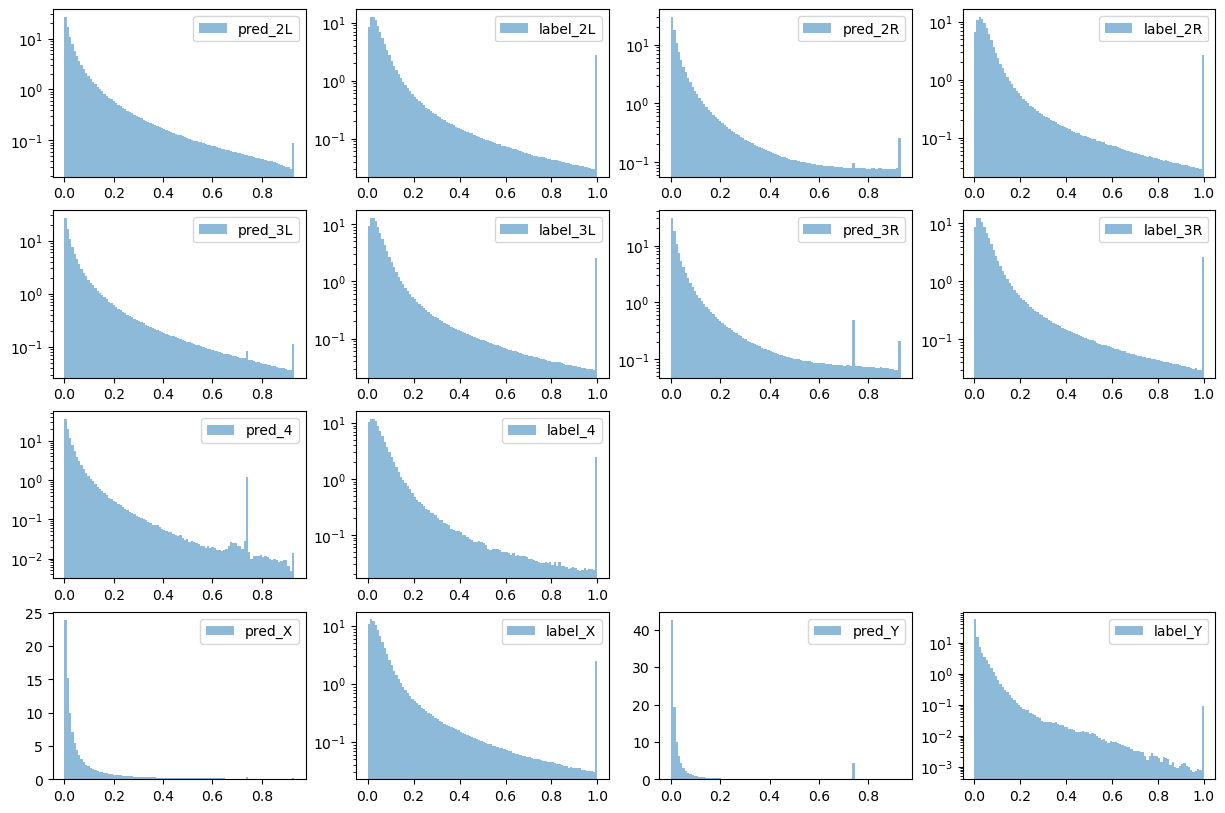

In [86]:
plt.figure(figsize=(15,10))
plt.subplot(4,4,1)
plt.yscale("log")
plt.hist(pred2L,bins=100,alpha=0.5,label="pred_2L",density=True)
plt.legend()
plt.subplot(4,4,2)
plt.yscale("log")
plt.hist(Y_2L,bins=100,alpha=0.5,label="label_2L",density=True)
plt.legend()

plt.subplot(4,4,3)
plt.yscale("log")
plt.hist(pred2R,bins=100,alpha=0.5,label="pred_2R",density=True)
plt.legend()
plt.subplot(4,4,4)
plt.yscale("log")
plt.hist(Y_2R,bins=100,alpha=0.5,label="label_2R",density=True)
plt.legend()

plt.subplot(4,4,5)
plt.yscale("log")
plt.hist(pred3L,bins=100,alpha=0.5,label="pred_3L",density=True)
plt.legend()
plt.subplot(4,4,6)
plt.yscale("log")
plt.hist(Y_3L,bins=100,alpha=0.5,label="label_3L",density=True)
plt.legend()

plt.subplot(4,4,7)
plt.yscale("log")
plt.hist(pred3R,bins=100,alpha=0.5,label="pred_3R",density=True)
plt.legend()
plt.subplot(4,4,8)
plt.yscale("log")
plt.hist(Y_3R,bins=100,alpha=0.5,label="label_3R",density=True)
plt.legend()

plt.subplot(4,4,9)
plt.yscale("log")
plt.hist(pred4,bins=100,alpha=0.5,label="pred_4",density=True)
plt.legend()
plt.subplot(4,4,10)
plt.yscale("log")
plt.hist(Y_4,bins=100,alpha=0.5,label="label_4",density=True)
plt.legend()

plt.yscale("log")
plt.subplot(4,4,13)
plt.hist(predX,bins=100,alpha=0.5,label="pred_X",density=True)
plt.legend()
plt.subplot(4,4,14)
plt.yscale("log")
plt.hist(Y_X,bins=100,alpha=0.5,label="label_X",density=True)
plt.legend()

plt.yscale("log")
plt.subplot(4,4,15)
plt.hist(predY,bins=100,alpha=0.5,label="pred_Y",density=True)
plt.legend()
plt.subplot(4,4,16)
plt.yscale("log")
plt.hist(Y_Y,bins=100,alpha=0.5,label="label_Y",density=True)
plt.legend()

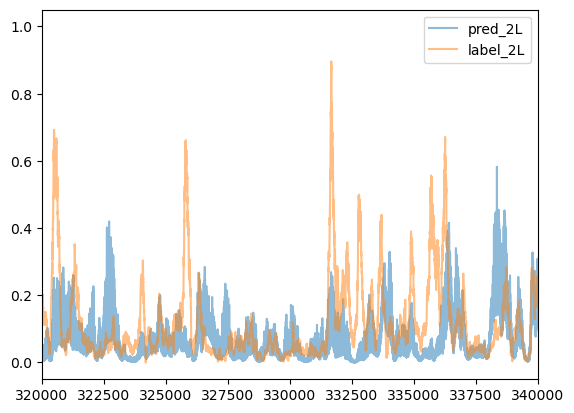

In [173]:

plt.plot(pred2L,alpha=0.5,label="pred_2L")
plt.plot(Y_2L[1000:-1001],alpha=0.5,label="label_2L")
plt.xlim(320_000,340_000)
plt.legend()

In [172]:
corr2L=np.corrcoef(Y_2L[1000:-1001],pred2L.ravel())[0][1]
corr2R=np.corrcoef(Y_2R[1000:-1001],pred2R.ravel())[0][1]
corr3L=np.corrcoef(Y_3L[1000:-1001],pred3R.ravel())[0][1]
corr3R=np.corrcoef(Y_3R[1000:-1001],pred3L.ravel())[0][1]
corr4=np.corrcoef(Y_4[1000:-1001],pred4.ravel())[0][1]
corrX=np.corrcoef(Y_X[1000:-1001],predX.ravel())[0][1]
corrY=np.corrcoef(Y_Y[1000:-1001],predY.ravel())[0][1]

In [197]:
print("correlation 2L", str(corr2L))
print("correlation 2R", str(corr2R))
print("correlation 3L", str(corr3L))
print("correlation 3R", str(corr3R))
print("correlation 4", str(corr4))
print("correlation X", str(corrX))
print("correlation Y", str(corrY))

correlation 2L 0.4868074473281253
correlation 2R 0.7591991784240223
correlation 3L 0.7251566619243192
correlation 3R 0.5021418601906498
correlation 4 0.2602856342885122
correlation X 0.4856281157617204
correlation Y 0.002920812751975333


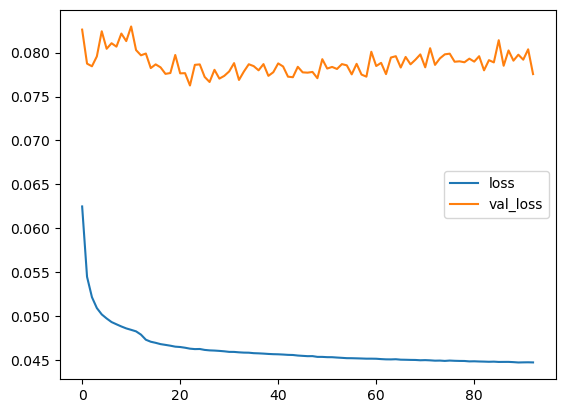

In [199]:
df = pd.read_csv ('/home/florian/projet/models/test_4/history.csv')
plt.plot(df['loss'],label='loss')
plt.plot(df['val_loss'],label="val_loss")
plt.legend()

In [200]:
pred2L=np.load('/home/florian/projet/models/preds_test_4.npz')['pred2L']
pred2R=np.load('/home/florian/projet/models/preds_test_4.npz')['pred2R']
pred3L=np.load('/home/florian/projet/models/preds_test_4.npz')['pred3L']
pred3R=np.load('/home/florian/projet/models/preds_test_4.npz')['pred3R']
pred4=np.load('/home/florian/projet/models/preds_test_4.npz')['pred4']
predX=np.load('/home/florian/projet/models/preds_test_4.npz')['predX']
predY=np.load('/home/florian/projet/models/preds_test_4.npz')['predY']

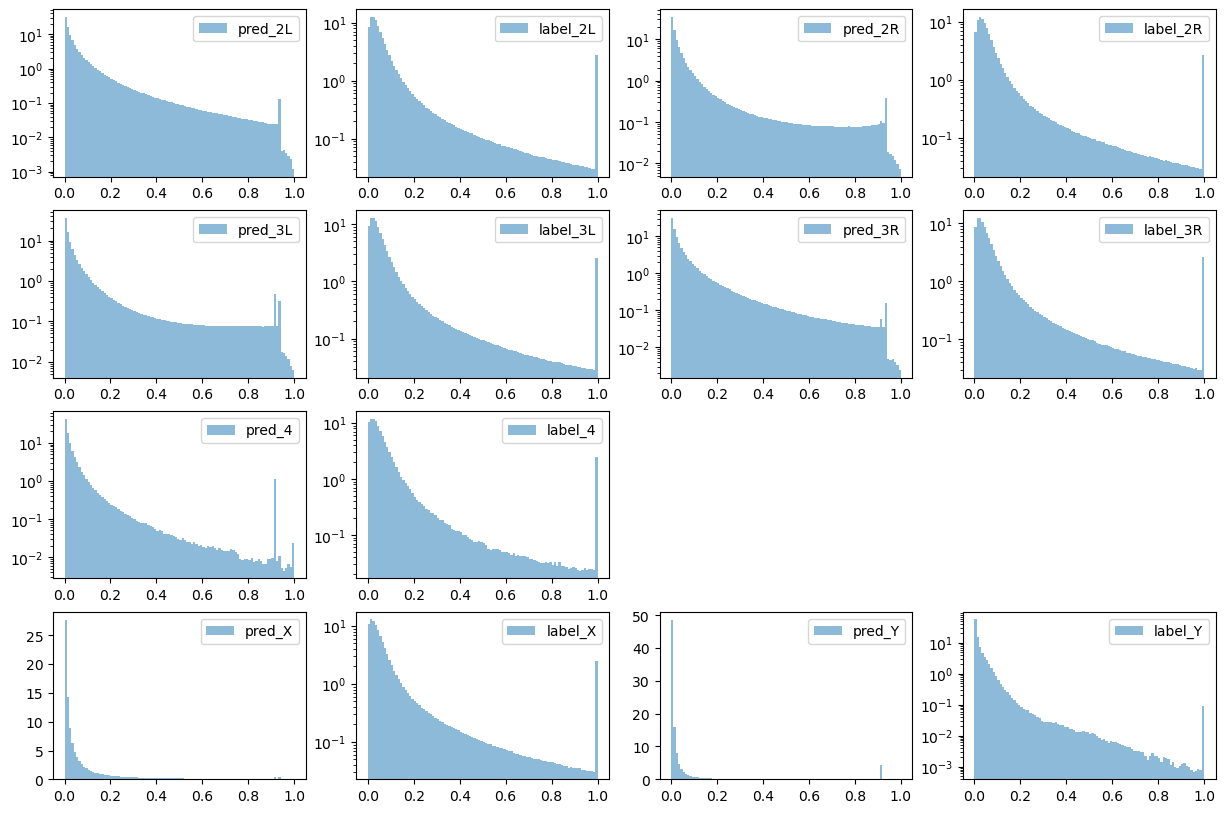

In [201]:
plt.figure(figsize=(15,10))
plt.subplot(4,4,1)
plt.yscale("log")
plt.hist(pred2L,bins=100,alpha=0.5,label="pred_2L",density=True)
plt.legend()
plt.subplot(4,4,2)
plt.yscale("log")
plt.hist(Y_2L,bins=100,alpha=0.5,label="label_2L",density=True)
plt.legend()

plt.subplot(4,4,3)
plt.yscale("log")
plt.hist(pred2R,bins=100,alpha=0.5,label="pred_2R",density=True)
plt.legend()
plt.subplot(4,4,4)
plt.yscale("log")
plt.hist(Y_2R,bins=100,alpha=0.5,label="label_2R",density=True)
plt.legend()

plt.subplot(4,4,5)
plt.yscale("log")
plt.hist(pred3L,bins=100,alpha=0.5,label="pred_3L",density=True)
plt.legend()
plt.subplot(4,4,6)
plt.yscale("log")
plt.hist(Y_3L,bins=100,alpha=0.5,label="label_3L",density=True)
plt.legend()

plt.subplot(4,4,7)
plt.yscale("log")
plt.hist(pred3R,bins=100,alpha=0.5,label="pred_3R",density=True)
plt.legend()
plt.subplot(4,4,8)
plt.yscale("log")
plt.hist(Y_3R,bins=100,alpha=0.5,label="label_3R",density=True)
plt.legend()

plt.subplot(4,4,9)
plt.yscale("log")
plt.hist(pred4,bins=100,alpha=0.5,label="pred_4",density=True)
plt.legend()
plt.subplot(4,4,10)
plt.yscale("log")
plt.hist(Y_4,bins=100,alpha=0.5,label="label_4",density=True)
plt.legend()

plt.yscale("log")
plt.subplot(4,4,13)
plt.hist(predX,bins=100,alpha=0.5,label="pred_X",density=True)
plt.legend()
plt.subplot(4,4,14)
plt.yscale("log")
plt.hist(Y_X,bins=100,alpha=0.5,label="label_X",density=True)
plt.legend()

plt.yscale("log")
plt.subplot(4,4,15)
plt.hist(predY,bins=100,alpha=0.5,label="pred_Y",density=True)
plt.legend()
plt.subplot(4,4,16)
plt.yscale("log")
plt.hist(Y_Y,bins=100,alpha=0.5,label="label_Y",density=True)
plt.legend()

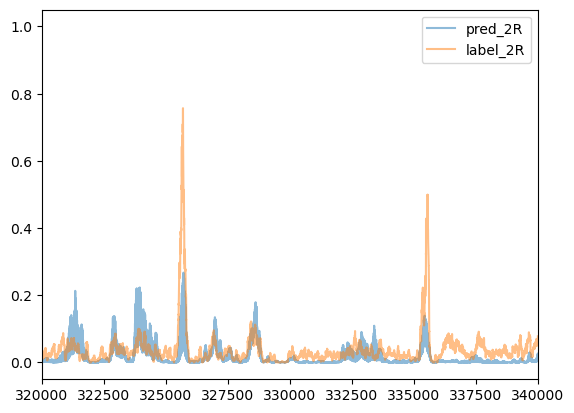

In [212]:
plt.plot(pred2R,alpha=0.5,label="pred_2R")
plt.plot(Y_2R[1000:-1001],alpha=0.5,label="label_2R")
plt.xlim(320_000,340_000)
plt.legend()

In [209]:
corr2L=np.corrcoef(Y_2L[1000:-1001],pred2L.ravel())[0][1]
corr2R=np.corrcoef(Y_2R[1000:-1001],pred2R.ravel())[0][1]
corr3R=np.corrcoef(Y_3R[1000:-1001],pred3R.ravel())[0][1]
corr3L=np.corrcoef(Y_3L[1000:-1001],pred3L.ravel())[0][1]
corr4=np.corrcoef(Y_4[1000:-1001],pred4.ravel())[0][1]
corrX=np.corrcoef(Y_X[1000:-1001],predX.ravel())[0][1]
corrY=np.corrcoef(Y_Y[1000:-1001],predY.ravel())[0][1]

In [210]:
print("correlation 2L", str(corr2L))
print("correlation 2R", str(corr2R))
print("correlation 3L", str(corr3L))
print("correlation 3R", str(corr3R))
print("correlation 4", str(corr4))
print("correlation X", str(corrX))
print("correlation Y", str(corrY))

correlation 2L 0.49248514171539454
correlation 2R 0.8111790934470575
correlation 3L 0.7568638056852761
correlation 3R 0.49733327812071465
correlation 4 0.23721661111261616
correlation X 0.4726213780513025
correlation Y -0.028590788444918115


In [ ]:
df = pd.read_csv ('/home/florian/projet/models/test_4/history.csv')
plt.plot(df['loss'],label='loss')
plt.plot(df['val_loss'],label="val_loss")
plt.legend()

In [ ]:
pred2L=np.load('/home/florian/projet/models/preds_test_4.npz')['pred2L']
pred2R=np.load('/home/florian/projet/models/preds_test_4.npz')['pred2R']
pred3L=np.load('/home/florian/projet/models/preds_test_4.npz')['pred3L']
pred3R=np.load('/home/florian/projet/models/preds_test_4.npz')['pred3R']
pred4=np.load('/home/florian/projet/models/preds_test_4.npz')['pred4']
predX=np.load('/home/florian/projet/models/preds_test_4.npz')['predX']
predY=np.load('/home/florian/projet/models/preds_test_4.npz')['predY']

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(4,4,1)
plt.yscale("log")
plt.hist(pred2L,bins=100,alpha=0.5,label="pred_2L",density=True)
plt.legend()
plt.subplot(4,4,2)
plt.yscale("log")
plt.hist(Y_2L,bins=100,alpha=0.5,label="label_2L",density=True)
plt.legend()

plt.subplot(4,4,3)
plt.yscale("log")
plt.hist(pred2R,bins=100,alpha=0.5,label="pred_2R",density=True)
plt.legend()
plt.subplot(4,4,4)
plt.yscale("log")
plt.hist(Y_2R,bins=100,alpha=0.5,label="label_2R",density=True)
plt.legend()

plt.subplot(4,4,5)
plt.yscale("log")
plt.hist(pred3L,bins=100,alpha=0.5,label="pred_3L",density=True)
plt.legend()
plt.subplot(4,4,6)
plt.yscale("log")
plt.hist(Y_3L,bins=100,alpha=0.5,label="label_3L",density=True)
plt.legend()

plt.subplot(4,4,7)
plt.yscale("log")
plt.hist(pred3R,bins=100,alpha=0.5,label="pred_3R",density=True)
plt.legend()
plt.subplot(4,4,8)
plt.yscale("log")
plt.hist(Y_3R,bins=100,alpha=0.5,label="label_3R",density=True)
plt.legend()

plt.subplot(4,4,9)
plt.yscale("log")
plt.hist(pred4,bins=100,alpha=0.5,label="pred_4",density=True)
plt.legend()
plt.subplot(4,4,10)
plt.yscale("log")
plt.hist(Y_4,bins=100,alpha=0.5,label="label_4",density=True)
plt.legend()

plt.yscale("log")
plt.subplot(4,4,13)
plt.hist(predX,bins=100,alpha=0.5,label="pred_X",density=True)
plt.legend()
plt.subplot(4,4,14)
plt.yscale("log")
plt.hist(Y_X,bins=100,alpha=0.5,label="label_X",density=True)
plt.legend()

plt.yscale("log")
plt.subplot(4,4,15)
plt.hist(predY,bins=100,alpha=0.5,label="pred_Y",density=True)
plt.legend()
plt.subplot(4,4,16)
plt.yscale("log")
plt.hist(Y_Y,bins=100,alpha=0.5,label="label_Y",density=True)
plt.legend()

In [ ]:
corr2L=np.corrcoef(Y_2L[1000:-1001],pred2L.ravel())[0][1]
corr2R=np.corrcoef(Y_2R[1000:-1001],pred2R.ravel())[0][1]
corr3R=np.corrcoef(Y_3R[1000:-1001],pred3R.ravel())[0][1]
corr3L=np.corrcoef(Y_3L[1000:-1001],pred3L.ravel())[0][1]
corr4=np.corrcoef(Y_4[1000:-1001],pred4.ravel())[0][1]
corrX=np.corrcoef(Y_X[1000:-1001],predX.ravel())[0][1]
corrY=np.corrcoef(Y_Y[1000:-1001],predY.ravel())[0][1]
print("correlation 2L", str(corr2L))
print("correlation 2R", str(corr2R))
print("correlation 3L", str(corr3L))
print("correlation 3R", str(corr3R))
print("correlation 4", str(corr4))
print("correlation X", str(corrX))
print("correlation Y", str(corrY))